# Display Images (Masks / Originak)

## COLOR IMAGES - ORIG / CROPPED

## Resized Mask and Frame

grey


(np.float64(-0.5), np.float64(1279.5), np.float64(799.5), np.float64(-0.5))

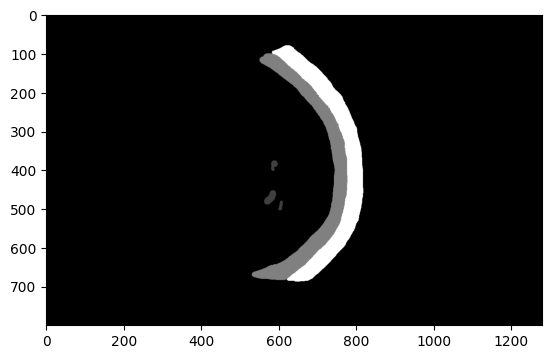

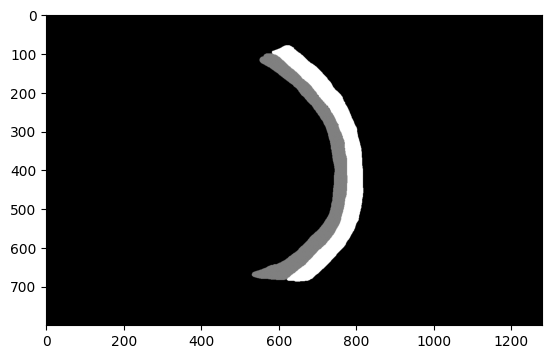

In [11]:
## ORIGINAL COLOR
import cv2
import matplotlib.pyplot as plt

BASE_PATH = "/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/"

import os, cv2, numpy as np, matplotlib.pyplot as plt

p = "/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/USFM_datasets_Seg/Seg/retina_usg/test_set/mask/Patient7__Subject_8.4.png"  # or your GDrive path

p_3 = "/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/USFM_datasets_Seg/Seg/retina_usg/test_set/mask_3class/Patient7__Subject_8.4.png"


# single-channel labels
print("grey")
plt.figure()

plt.imshow(cv2.imread(p, cv2.IMREAD_UNCHANGED), cmap='gray');
plt.axis('on')
plt.figure()

plt.imshow(cv2.imread(p_3, cv2.IMREAD_UNCHANGED), cmap='gray');
plt.axis('on')



# print(mask1.shape, mask1.dtype, np.unique(mask1)[:10])

2
shape: (512, 512) dtype: uint8 min/max: 2 2
{2: '262144  (100.00%)'}


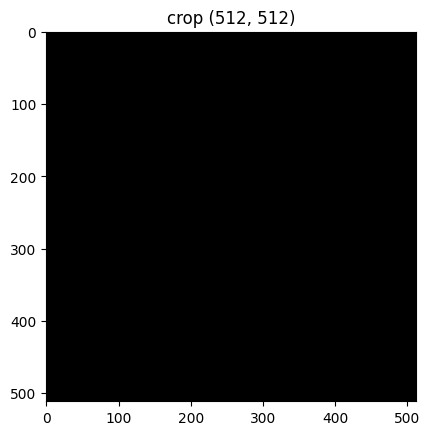

In [15]:

orig = cv2.imread("/Users/saurav1/Desktop/Patient1__Subject_1.6.png", cv2.IMREAD_UNCHANGED)
m = cv2.imread( "/Users/saurav1/Desktop/Patient1__Subject_1.6.png", cv2.IMREAD_UNCHANGED)
print(m.ndim)
# print("orig shape:", orig.shape)
# print("crop shape:", m.shape)

# plt.figure()
# plt.title(f"orig {orig.shape}")
# plt.imshow(orig, cmap='gray'); plt.axis('on')

plt.figure()
plt.title(f"crop {m.shape}")
plt.imshow(m, cmap='gray'); plt.axis('on')


print("shape:", m.shape, "dtype:", m.dtype, "min/max:", m.min(), m.max())
vals, cnts = np.unique(m, return_counts=True)
total = m.size
print({int(v): f"{c}  ({c/total:.2%})" for v,c in zip(vals, cnts)})

In [12]:
import os, glob, cv2, numpy as np

mask_dir = "/Users/saurav1/Desktop/mask_pre"  # <-- change me
paths = sorted(glob.glob(os.path.join(mask_dir, "*.png")))

tot = zeros_only = single_nonzero = multi = 0
pixel_hist = {}

for p in paths:
    m = cv2.imread(p, cv2.IMREAD_UNCHANGED)
    if m is None:
        print(f"!! failed to read: {p}")
        continue

    vals, cnts = np.unique(m, return_counts=True)
    total_pix = m.size

    # per-file report
    dist = {int(v): f"{c} ({c/total_pix:.2%})" for v, c in zip(vals, cnts)}
    print(f"{os.path.basename(p)}  shape={m.shape} dtype={m.dtype} "
          f"min={m.min()} max={m.max()}  classes={list(map(int, vals))}  dist={dist}")

    # summary counters
    tot += 1
    if len(vals) == 1:
        if vals[0] == 0:
            zeros_only += 1
        else:
            single_nonzero += 1
    else:
        multi += 1

    for v, c in zip(vals, cnts):
        pixel_hist[int(v)] = pixel_hist.get(int(v), 0) + int(c)

# summary
print("\n--- Summary ---")
print(f"files: {tot}, zeros_only: {zeros_only}, single_nonzero: {single_nonzero}, multi_class: {multi}")
pix_total = sum(pixel_hist.values()) or 1
print("pixel share per class:", {k: f"{v} ({v/pix_total:.2%})" for k, v in sorted(pixel_hist.items())})

Patient1__Subject_1.1.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.2.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.3.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.4.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.5.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.6.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.7.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.8.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}
Patient1__Subject_1.9.png  shape=(512, 512) dtype=uint8 min=3 max=3  classes=[3]  dist={3: '262144 (100.00%)'}



## Augmentation Preview



crop shape: (512, 512)


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

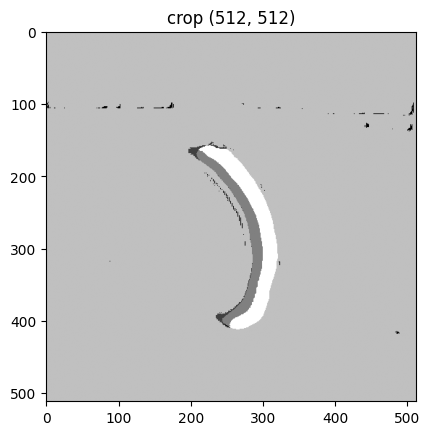

In [14]:
mask = cv2.imread(BASE_PATH + "runs/seg_unetpp/eval/pred_ids/images__Patient6__Subject 16.1.png_pred_ids.png", cv2.IMREAD_UNCHANGED)
# mask = cv2.imread(BASE_PATH + "runs/seg_unetpp/eval/pred_viz/images__Patient6__Subject 16.1.png_pred_viz.png", cv2.IMREAD_UNCHANGED)

print("crop shape:", mask.shape)

plt.figure()
plt.title(f"crop {mask.shape}")
plt.imshow(mask, cmap='gray');
plt.axis('on')


### GT vs Pred

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.2.png.png


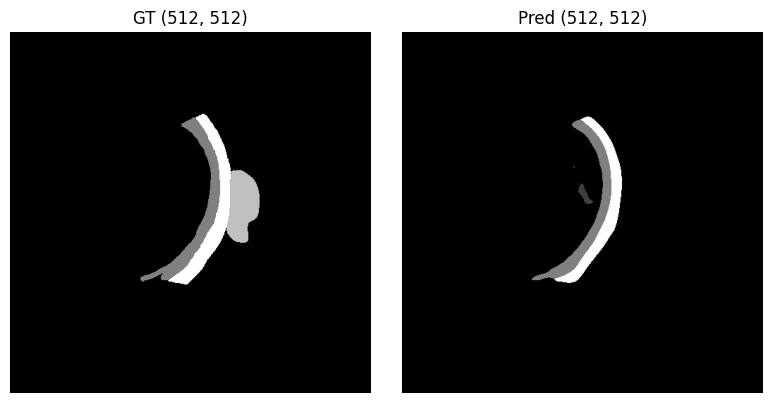

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient7__Subject 8.4.png.png


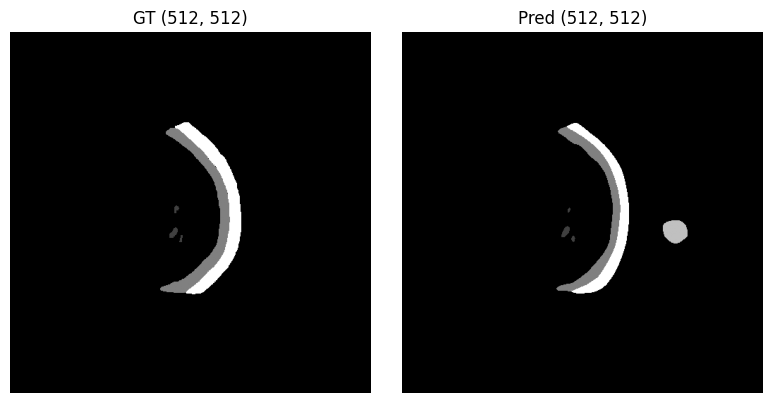

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.3.png.png


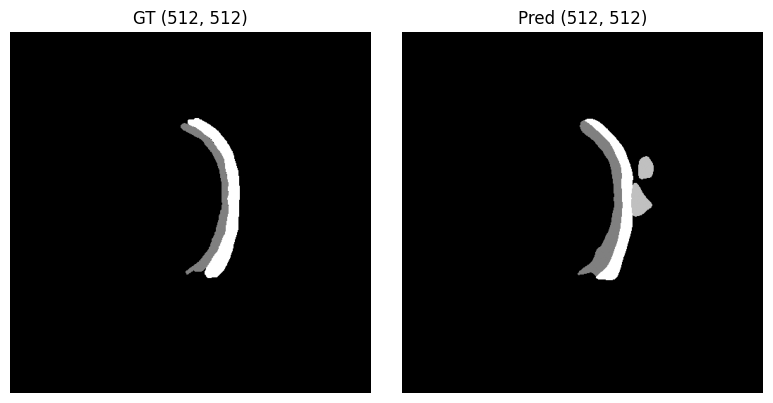

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.8.png.png


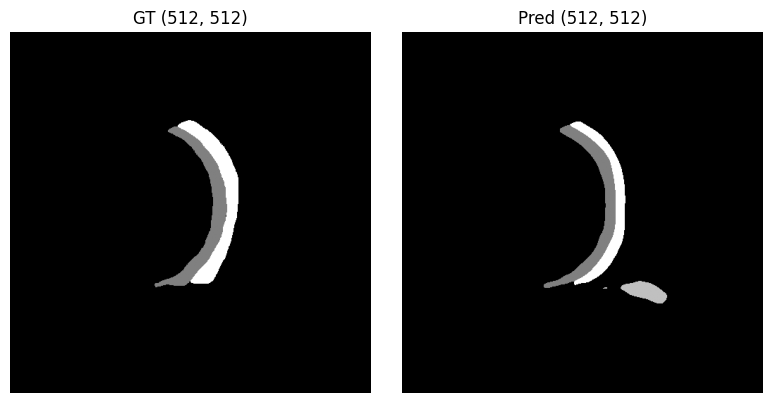

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.1.png.png


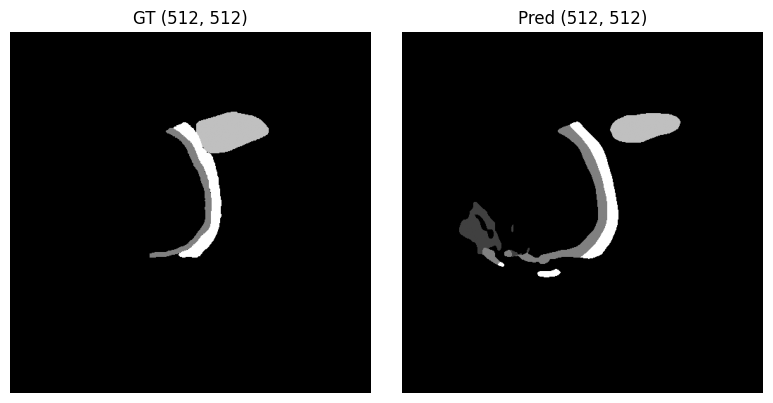

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.9.png.png


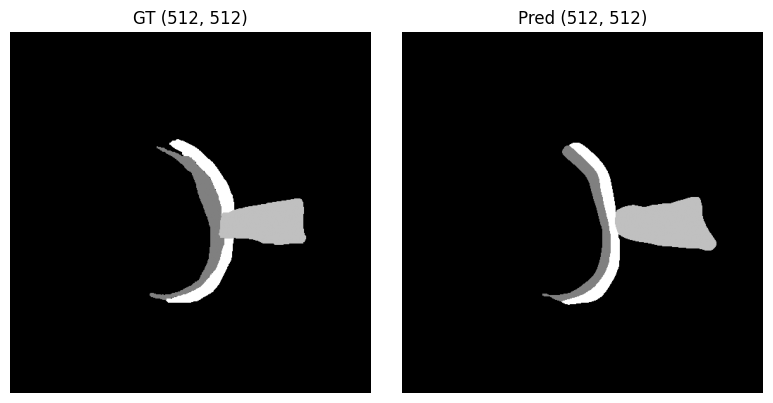

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.5.png.png


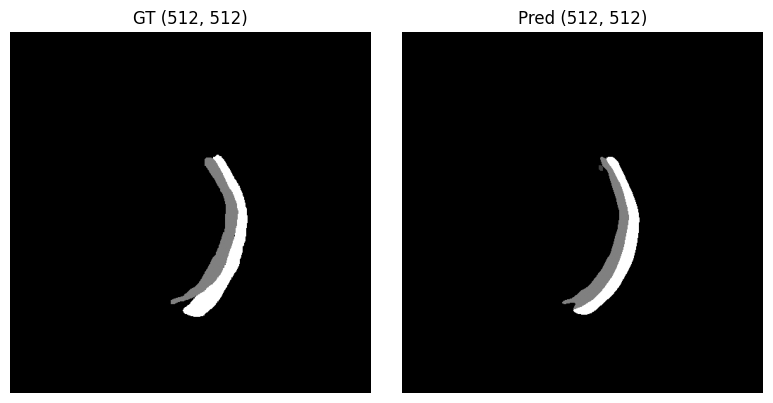

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient7__Subject 8.3.png.png


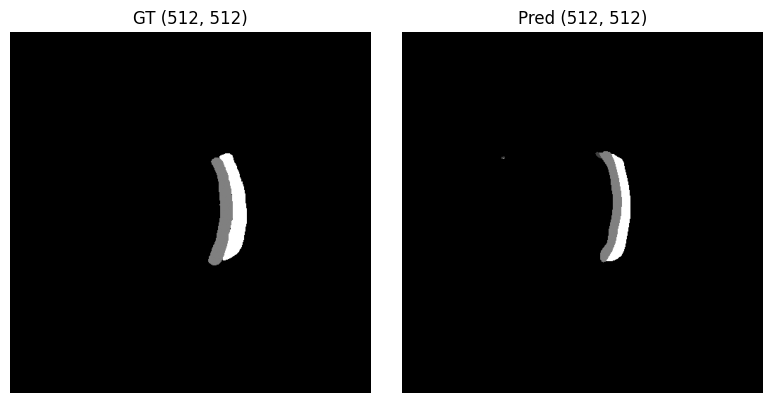

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient7__Subject 8.2.png.png


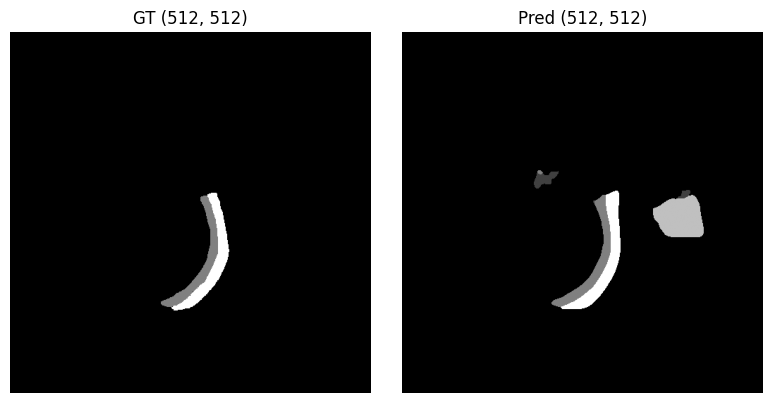

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.4.png.png


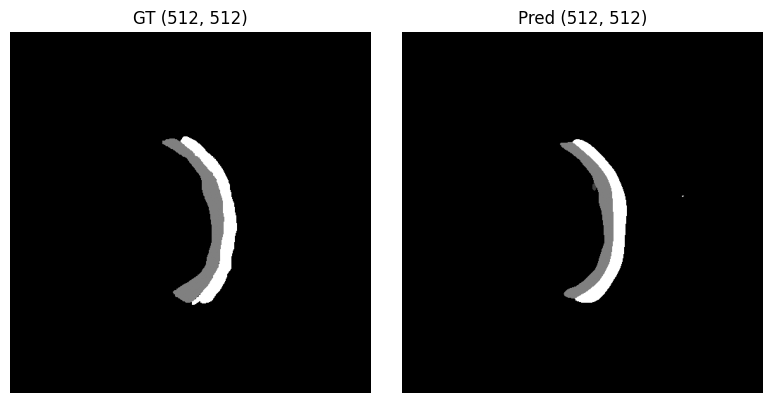

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.6.png.png


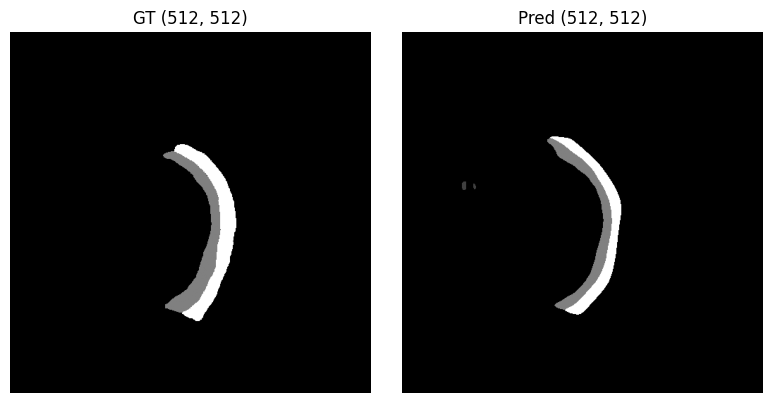

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.10.png.png


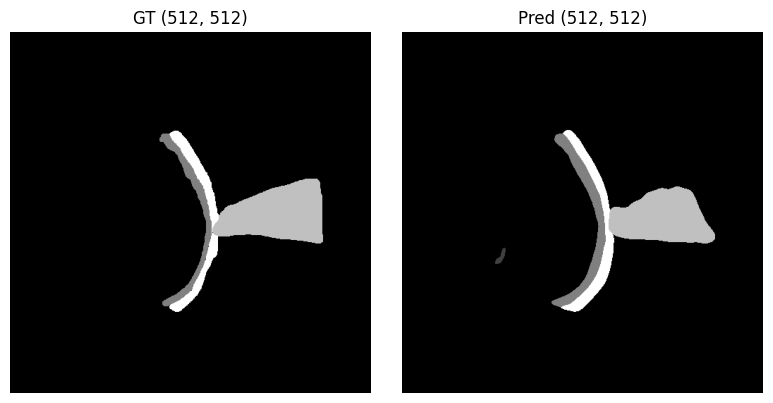

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient4__Subject 4.7.png.png


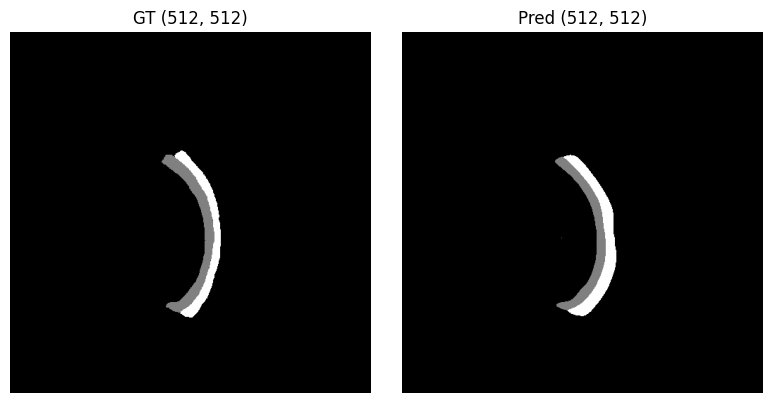

/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/mask_pre/images__Patient7__Subject 8.1.png.png


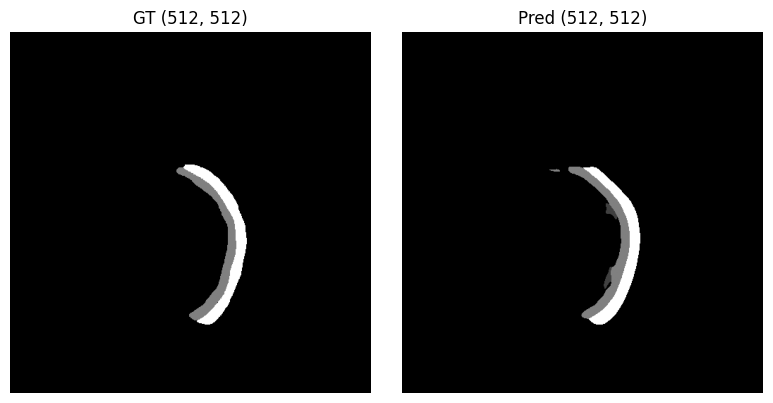

Pred unique labels: [0, 1, 2, 3, 4]

=== Per-class presence summary over folder ===
background      | GT pixels:   96.417%  Pred pixels: 96.407%  ||  GT images:   100.0%  Pred images: 100.0%
vitreous_humor  | GT pixels:    0.005%  Pred pixels:  0.109%  ||  GT images:     7.1%  Pred images:  78.6%
retina          | GT pixels:    1.381%  Pred pixels:  1.354%  ||  GT images:   100.0%  Pred images: 100.0%
optic_nerve     | GT pixels:    0.650%  Pred pixels:  0.719%  ||  GT images:    28.6%  Pred images:  57.1%
choroid         | GT pixels:    1.546%  Pred pixels:  1.411%  ||  GT images:   100.0%  Pred images: 100.0%


In [5]:
import cv2, numpy as np, glob, os
import matplotlib.pyplot as plt

root = "/Users/saurav1/python/masters/arizona/2nd/fall/retina_ultrasound_annotation/work_dir/runs/seg_transunet/eval/"

num_classes = 5  # 0=bg, 1=VH, 2=retina, 3=ON, 4=choroid
class_names = {
    0: "background",
    1: "vitreous_humor",
    2: "retina",
    3: "optic_nerve",
    4: "choroid",
}

vals = set()

# accumulators
gt_pixels      = np.zeros(num_classes, dtype=np.int64)
pred_pixels    = np.zeros(num_classes, dtype=np.int64)
gt_img_present = np.zeros(num_classes, dtype=np.int64)
pred_img_present = np.zeros(num_classes, dtype=np.int64)

total_pixels = 0
num_images   = 0

for p in glob.glob(os.path.join(root, "mask_pre", "*.png"))[:200]:
    print(p)

    gt = cv2.imread(p.replace("mask_pre", "mask_gt"), cv2.IMREAD_UNCHANGED)
    m  = cv2.imread(p, cv2.IMREAD_UNCHANGED)

    # sanity: ensure shapes match
    assert gt.shape == m.shape, f"Shape mismatch {gt.shape} vs {m.shape} for {p}"

    h, w = gt.shape[:2]
    total_pixels += h * w
    num_images   += 1

    # one figure, two subplots in a row (optional – keep or comment out if too many)
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.title(f"GT {gt.shape}")
    plt.imshow(gt, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Pred {m.shape}")
    plt.imshow(m, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    vals.update(np.unique(m).tolist())

    # --- accumulate per-class stats ---
    for c in range(num_classes):
        gt_mask   = (gt == c)
        pred_mask = (m  == c)

        gt_pixels[c]   += int(gt_mask.sum())
        pred_pixels[c] += int(pred_mask.sum())

        if gt_mask.any():
            gt_img_present[c] += 1
        if pred_mask.any():
            pred_img_present[c] += 1

print("Pred unique labels:", sorted(vals))

print("\n=== Per-class presence summary over folder ===")
for c in range(num_classes):
    name = class_names.get(c, f"class_{c}")
    if total_pixels > 0 and num_images > 0:
        gt_pix_pct   = 100.0 * gt_pixels[c]   / float(total_pixels)
        pred_pix_pct = 100.0 * pred_pixels[c] / float(total_pixels)

        gt_img_pct   = 100.0 * gt_img_present[c]   / float(num_images)
        pred_img_pct = 100.0 * pred_img_present[c] / float(num_images)
    else:
        gt_pix_pct = pred_pix_pct = gt_img_pct = pred_img_pct = float("nan")

    print(
        f"{name:15s} | "
        f"GT pixels:   {gt_pix_pct:6.3f}%  "
        f"Pred pixels: {pred_pix_pct:6.3f}%  ||  "
        f"GT images:   {gt_img_pct:5.1f}%  "
        f"Pred images: {pred_img_pct:5.1f}%"
    )